In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans



In [16]:
# Lodd the dataset 
data=pd.read_csv('Economic Indicators And Inflation (1) (1).csv')    

In [17]:
# Show the first few rows of the dataset
data.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


In [18]:
# count the number of missing values in each column
data.isna().sum()   

Country                   0
 Year                     0
 GDP (in billion USD)     0
 Inflation Rate (%)       0
 Unemployment Rate (%)    0
 Economic Growth (%)      0
dtype: int64

In [19]:
# Count duplicates in the dataset
data.duplicated().sum()

np.int64(0)

In [20]:
# Print the all column names
data.columns

Index(['Country', ' Year', ' GDP (in billion USD)', ' Inflation Rate (%)',
       ' Unemployment Rate (%)', ' Economic Growth (%)'],
      dtype='object')

In [24]:
#Remove extra Space 
data.columns = data.columns.str.strip()

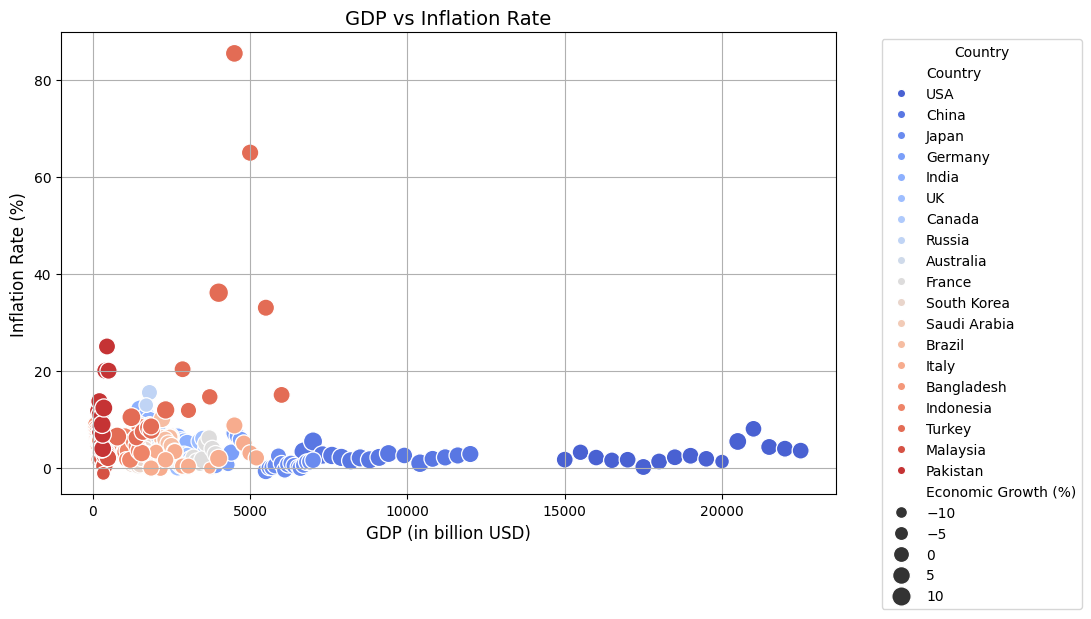

In [22]:
# --- How to Read This Chart ---
# This scatter plot shows the relationship between GDP and Inflation Rate for different countries.
# ➔ X-axis: GDP (in billion USD)
# ➔ Y-axis: Inflation Rate (%)
# ➔ Color: Represents different countries.
# ➔ Size: Economic Growth (%) - Bigger bubble means higher economic growth.
# 
# Interpretation:
# ▪ Countries with higher GDP usually tend to have moderate inflation.
# ▪ Countries with very high inflation and low GDP can be spotted at top-left area.
# ▪ Compare bubbles: Large bubble = High Economic Growth Rate.

# --- Plotting GDP vs Inflation Rate ---
plt.figure(figsize=(10, 6))  # Set the size of the figure

sns.scatterplot(
    data=data,  # Dataset to use
    x="GDP (in billion USD)",  # X-axis -> GDP
    y="Inflation Rate (%)",    # Y-axis -> Inflation Rate
    hue="Country",              # Different countries will have different colors
    size="Economic Growth (%)", # Bubble size according to Economic Growth
    palette="coolwarm",         # Color theme from cool (blue) to warm (red)
    sizes=(50, 200)             # Size range for bubbles
)

# --- Customizing the Plot ---
plt.title("GDP vs Inflation Rate", fontsize=14)
plt.xlabel("GDP (in billion USD)", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

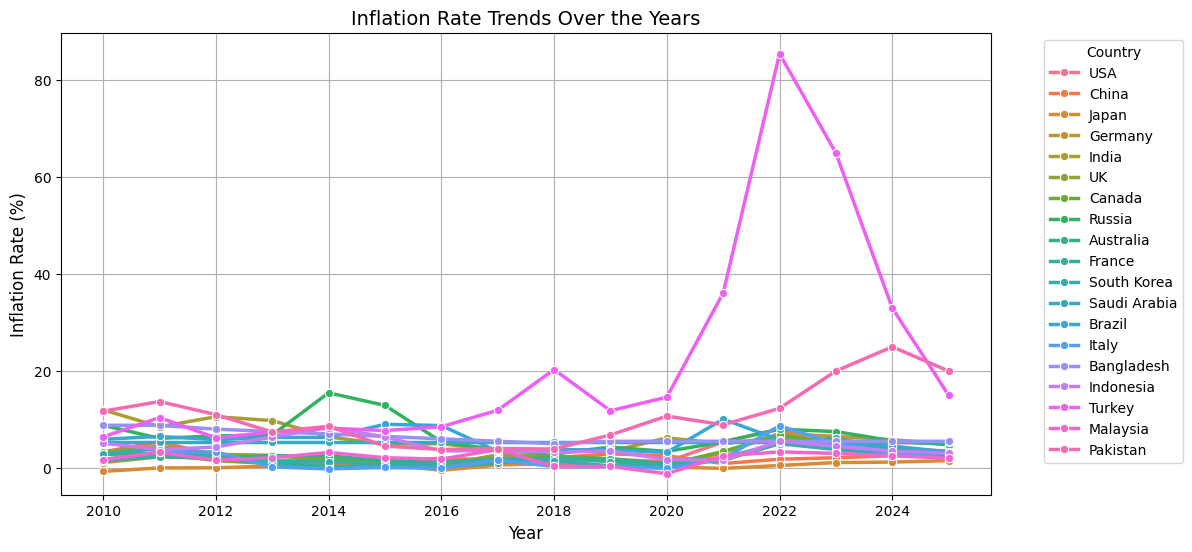

In [27]:
# --- How to Read This Chart ---
# This line chart shows how the Inflation Rate (%) has changed over the years for different countries.
# ➔ X-axis: Year
# ➔ Y-axis: Inflation Rate (%)
# ➔ Color: Represents different countries.
# ➔ Marker: Circles on the line represent actual recorded data points.
#
# Interpretation:
# ▪ Check how inflation moves up or down year-by-year for each country.
# ▪ A sharp rise in the line means inflation spiked that year.
# ▪ A downward slope indicates inflation decreased.
# ▪ Compare trends between countries to understand economic stability.

# --- Plotting Inflation Trend Over the Years ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=data,
    x="Year",                    # X-axis -> Year
    y="Inflation Rate (%)",      # Y-axis -> Inflation Rate (corrected column name)
    hue="Country",               # Different lines for different countries
    marker="o",                  # Circle markers on data points
    linewidth=2.5                # Line width for better visibility
)

# --- Customizing the Plot ---
plt.title("Inflation Rate Trends Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

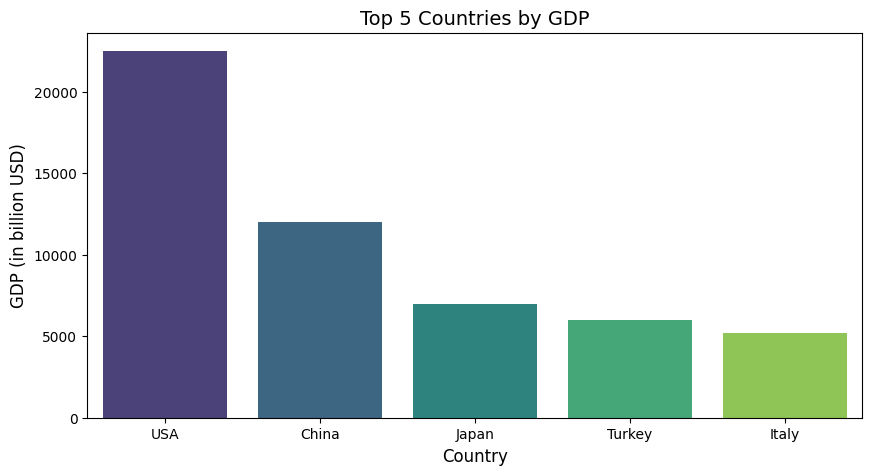

In [29]:
# Top 5 Countries by GDP (Bar Chart)
top_gdp_countries = data.groupby("Country")["GDP (in billion USD)"].max().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_gdp_countries.index, y=top_gdp_countries.values, hue=top_gdp_countries.index, palette="viridis")
plt.title("Top 5 Countries by GDP", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP (in billion USD)", fontsize=12)
plt.show()


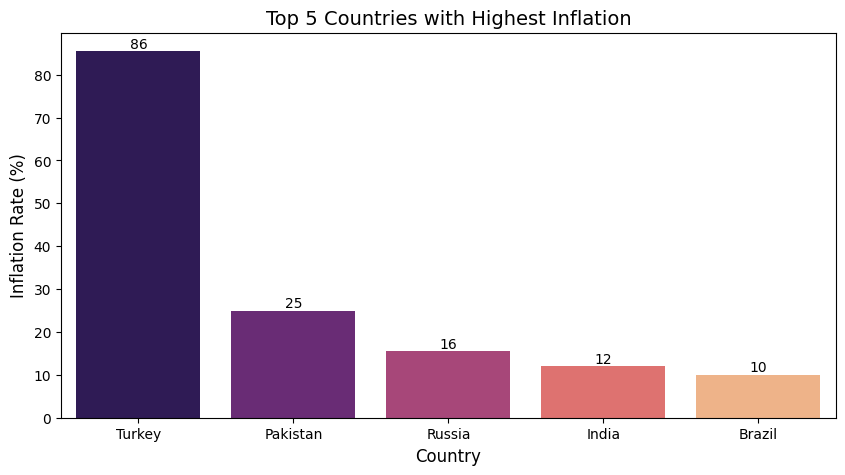

In [32]:
# Top 5 Countries with Highest Inflation (Bar Chart)
top_inflation_countries = data.groupby("Country")["Inflation Rate (%)"].max().nlargest(5)
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=top_inflation_countries.index, y=top_inflation_countries.values, hue=top_inflation_countries.index, palette="magma")
plt.title("Top 5 Countries with Highest Inflation", fontsize=14)
plt.xlabel("Country", fontsize=12)

[ax.bar_label(container, fmt="{:,.0f}") for container in ax.containers]

plt.ylabel("Inflation Rate (%)", fontsize=12)
plt.show()


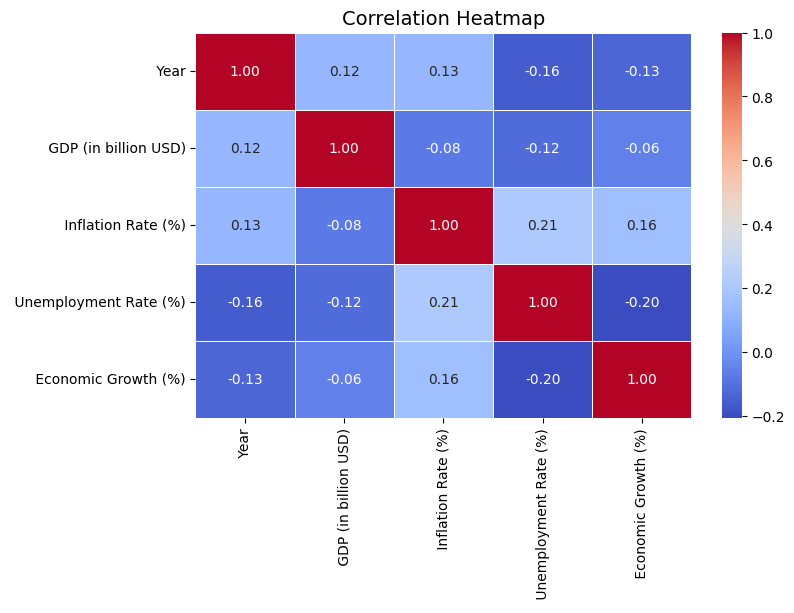

In [ ]:
# Select only numerical columns
numerical_df = data.select_dtypes(include=["number"])

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

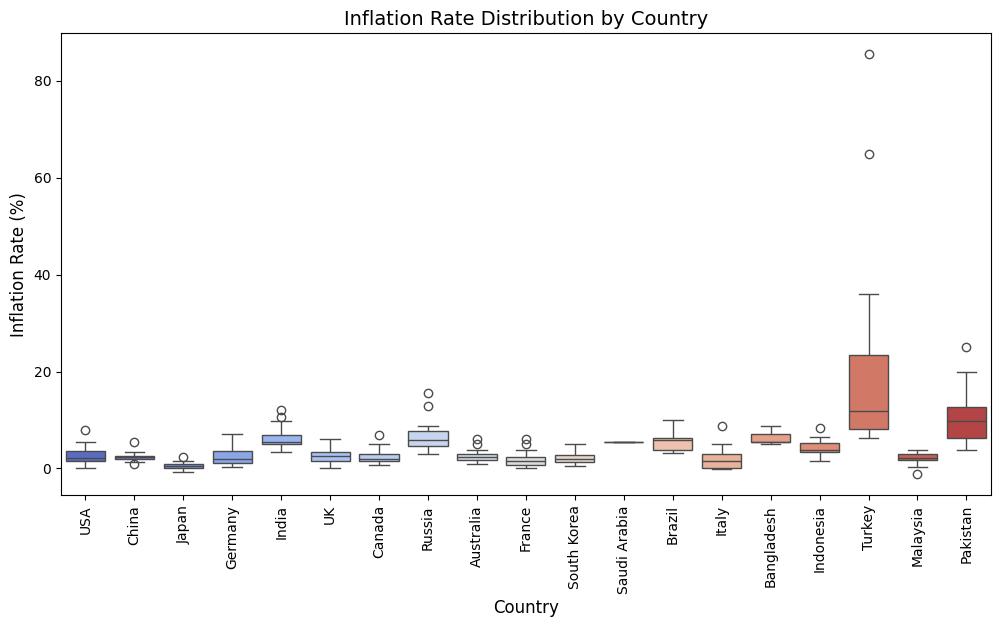

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Country", y="Inflation Rate (%)", hue="Country", palette="coolwarm")
plt.title("Inflation Rate Distribution by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)
plt.xticks(rotation=90)
plt.show()


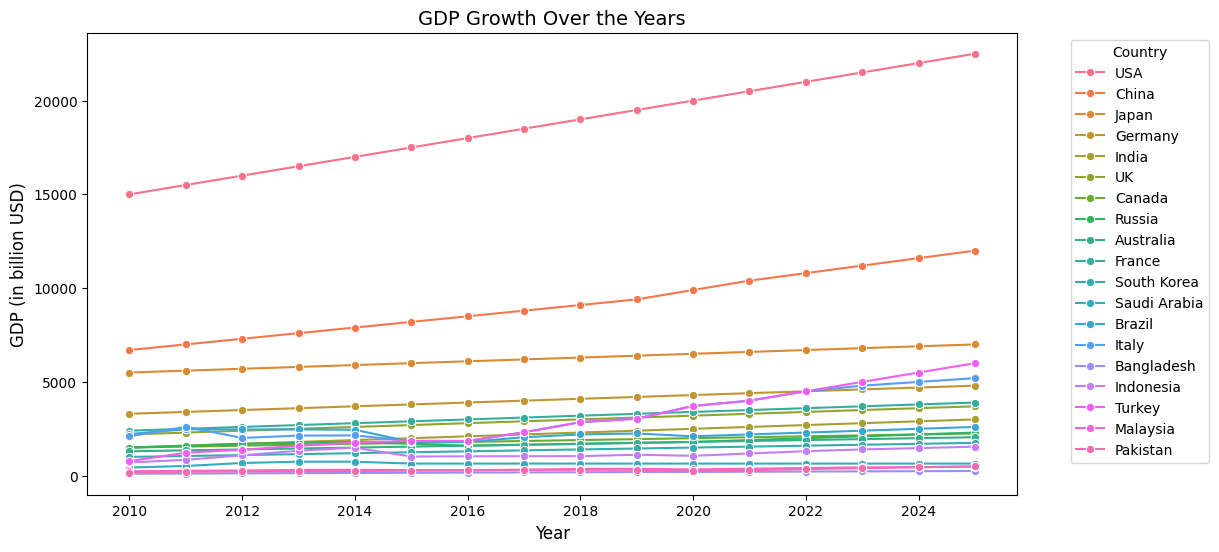

In [39]:
# --- Highlights and Comments ---
# This line chart visualizes the GDP growth over the years for different countries.
# ➔ X-axis: Year
# ➔ Y-axis: GDP (in billion USD)
# ➔ Color: Represents different countries.
# ➔ Marker: Circles on the line represent actual recorded data points.
#
# Interpretation:
# ▪ Observe how GDP changes year-by-year for each country.
# ▪ Steeper slopes indicate rapid GDP growth.
# ▪ Compare trends between countries to identify economic growth patterns.

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Year", y="GDP (in billion USD)", hue="Country", marker="o")
plt.title("GDP Growth Over the Years", fontsize=14)

plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP (in billion USD)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


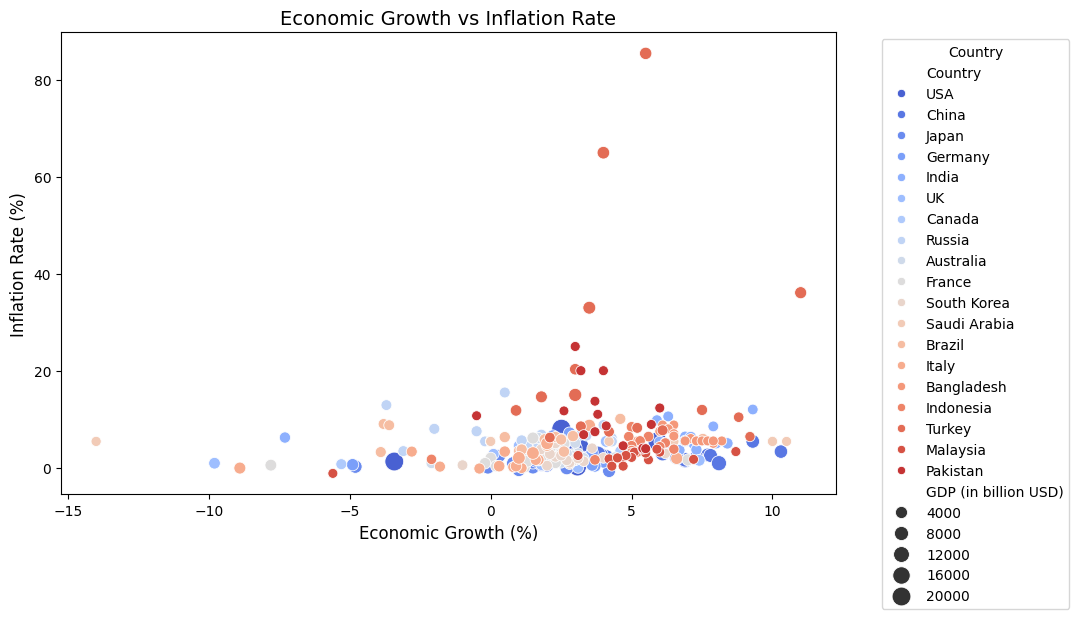

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Economic Growth (%)", y="Inflation Rate (%)", hue="Country", size="GDP (in billion USD)", palette="coolwarm", sizes=(50, 200))
plt.title("Economic Growth vs Inflation Rate", fontsize=14)
plt.xlabel("Economic Growth (%)", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


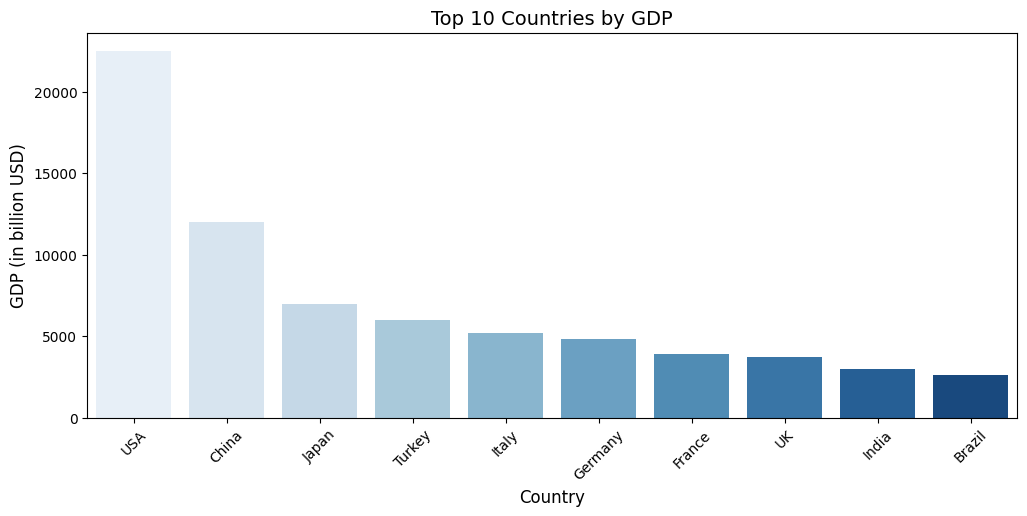

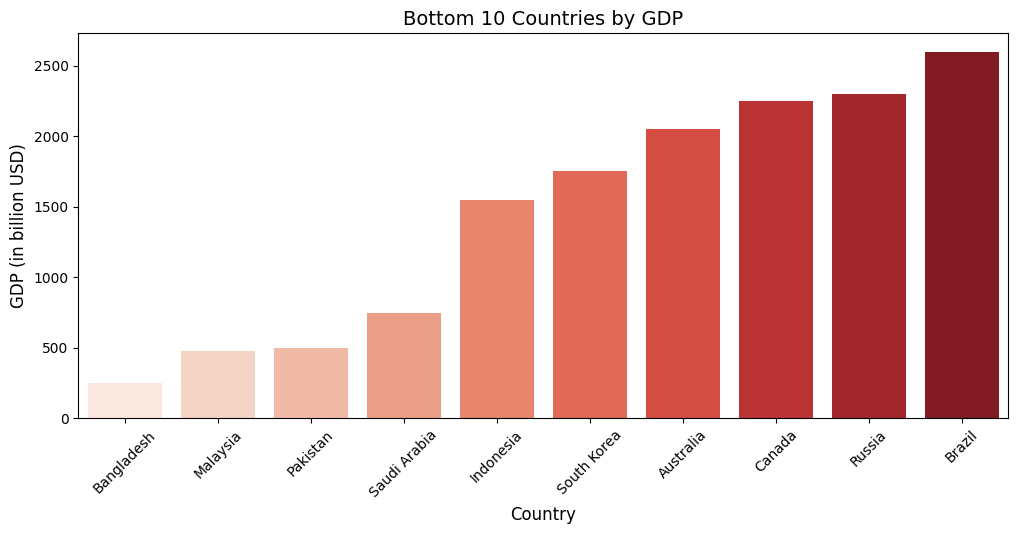

In [47]:
top_gdp = data.groupby("Country")["GDP (in billion USD)"].max().nlargest(10)
low_gdp = data.groupby("Country")["GDP (in billion USD)"].max().nsmallest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_gdp.index, y=top_gdp.values, hue=top_gdp.index, palette="Blues")
plt.title("Top 10 Countries by GDP", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP (in billion USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=low_gdp.index, y=low_gdp.values, hue=low_gdp.index, palette="Reds")
plt.title("Bottom 10 Countries by GDP", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP (in billion USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


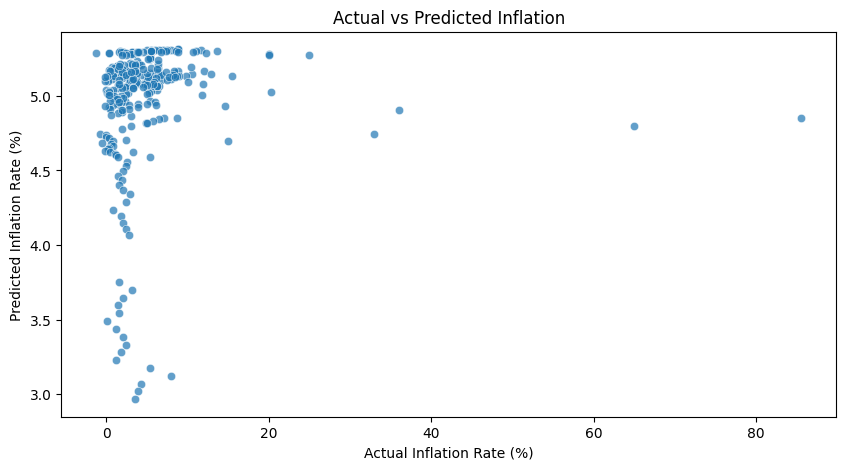

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting numerical features
numerical_df = data.select_dtypes(include=["number"]).dropna()

# Defining X (GDP) and y (Inflation Rate)
X = numerical_df[[" GDP (in billion USD)"]]
y = numerical_df[" Inflation Rate (%)"]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting Inflation based on GDP
data["Predicted Inflation"] = model.predict(X)

# Scatter Plot of Actual vs Predicted Inflation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data[" Inflation Rate (%)"], y=data["Predicted Inflation"], alpha=0.7)
plt.xlabel("Actual Inflation Rate (%)")
plt.ylabel("Predicted Inflation Rate (%)")
plt.title("Actual vs Predicted Inflation")
plt.show()

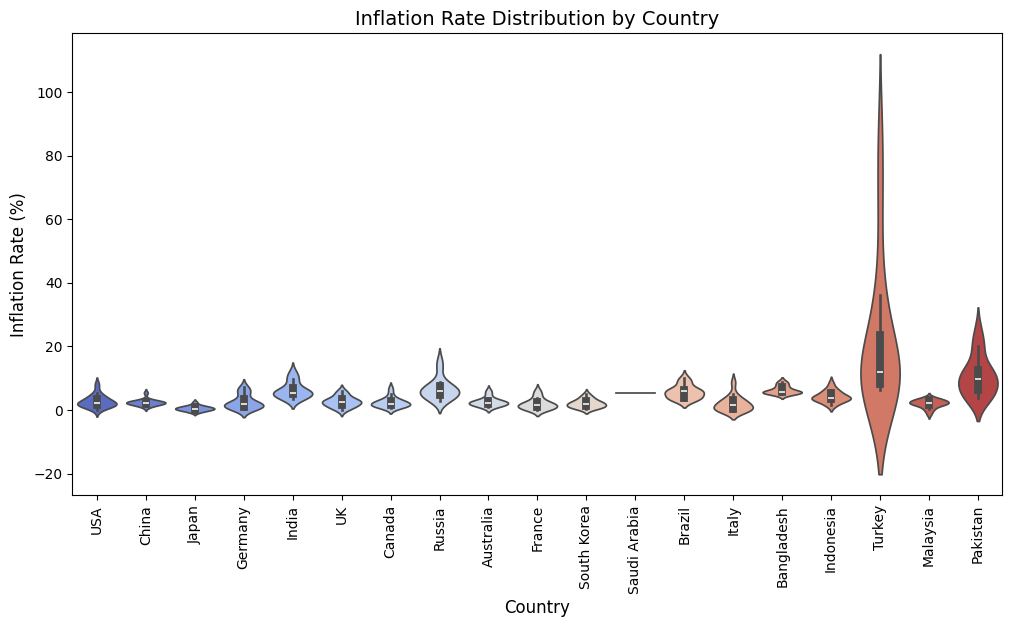

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="Country", y="Inflation Rate (%)", hue="Country", palette="coolwarm")
plt.title("Inflation Rate Distribution by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)
plt.xticks(rotation=90)
plt.show()


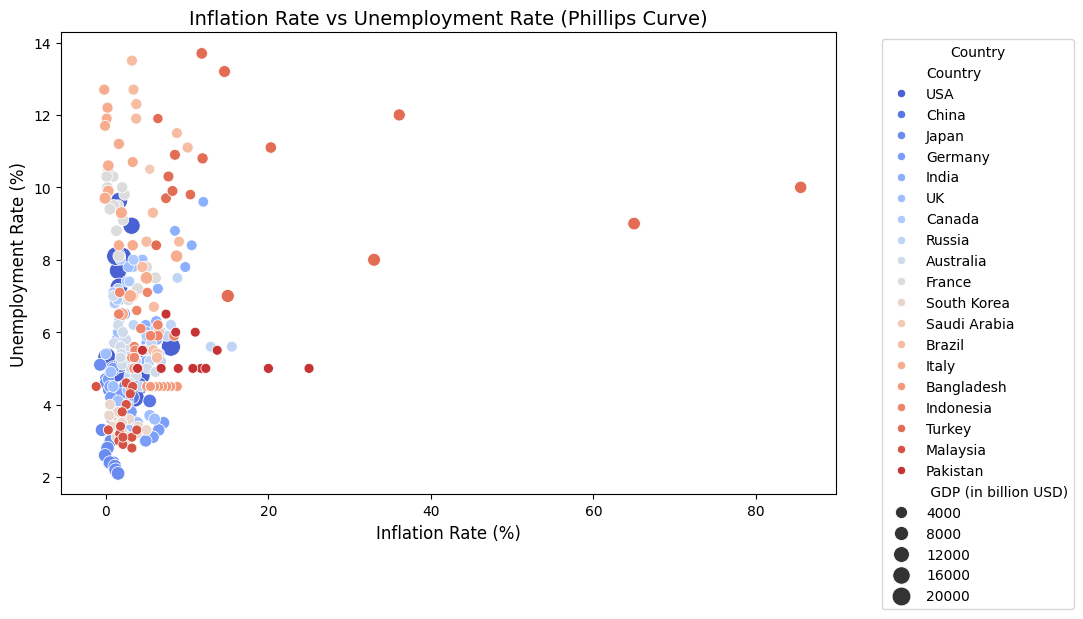

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=" Inflation Rate (%)", y=" Unemployment Rate (%)", hue="Country", size=" GDP (in billion USD)", palette="coolwarm", sizes=(50, 200))
plt.title("Inflation Rate vs Unemployment Rate (Phillips Curve)", fontsize=14)
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


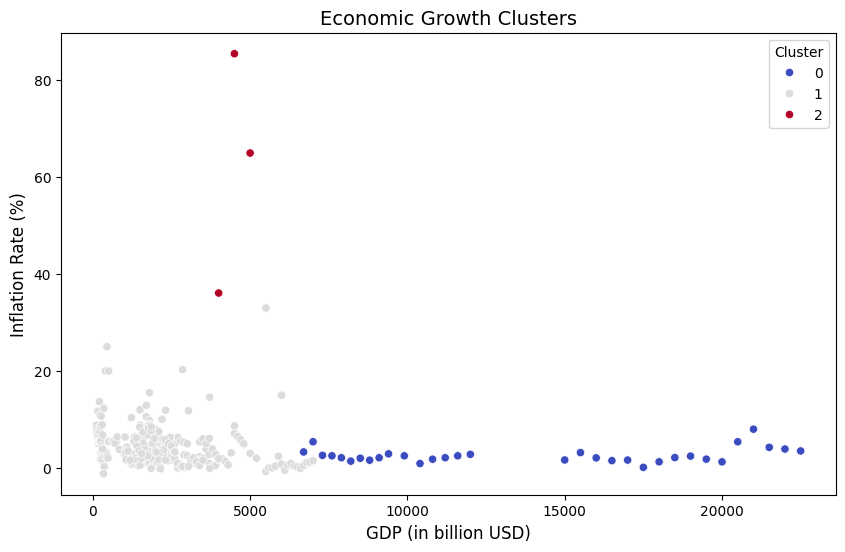

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting Numerical Features
num_features = data[["GDP (in billion USD)", "Inflation Rate (%)", "Economic Growth (%)"]].dropna()

# Standardizing Data
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(num_features_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="GDP (in billion USD)", y="Inflation Rate (%)", hue="Cluster", palette="coolwarm")
plt.title("Economic Growth Clusters", fontsize=14)
plt.xlabel("GDP (in billion USD)", fontsize=12)
plt.ylabel("Inflation Rate (%)", fontsize=12)
plt.show()


In [ ]:
data

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%),Predicted Inflation,Cluster
0,USA,2010,15000.0,1.64,9.63,2.55,3.752266,0
1,USA,2011,15500.0,3.16,8.94,1.53,3.699877,0
2,USA,2012,16000.0,2.07,8.10,2.28,3.647488,0
3,USA,2013,16500.0,1.50,7.70,1.84,3.595099,0
4,USA,2014,17000.0,1.62,7.25,2.53,3.542710,0
...,...,...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70,5.292919,1
300,Pakistan,2022,350.0,12.30,5.00,6.00,5.287261,1
301,Pakistan,2023,400.0,20.00,5.00,4.00,5.282022,1
302,Pakistan,2024,450.0,25.00,5.00,3.00,5.276783,1


In [ ]:
data.columns =data.columns.str.strip()

In [ ]:
# Drop non-numeric columns (like 'Country' and 'Cluster') before scaling
numeric_columns = data.select_dtypes(include=["number"]).columns
data_for_scaling = data[numeric_columns]

# Scale the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_scaling)

# Convert the scaled data back to DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_columns)

# Add the non-numeric columns back (if needed)
data_scaled_df["Country"] = data["Country"]
data_scaled_df["Cluster"] = data["Cluster"]

# Now `data_scaled_df` should have 7 columns (6 numeric + 'Country' and 'Cluster')



In [ ]:
data.columns

Index(['Country', 'Year', 'GDP (in billion USD)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Economic Growth (%)', 'Predicted Inflation',
       'Cluster'],
      dtype='object')

✅ R² Score: 1.0000


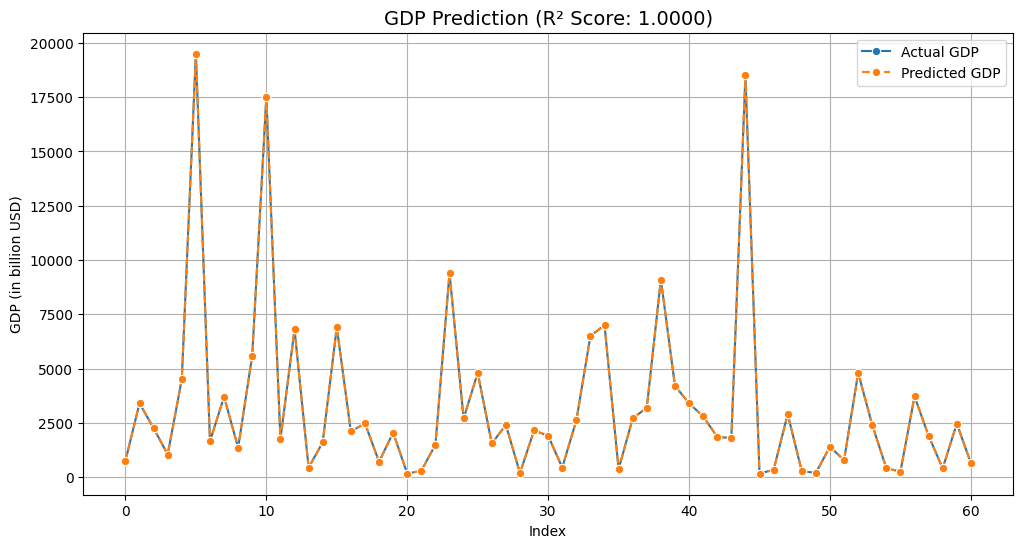

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Load
# data = pd.read_csv('yourfile.csv')  # assume data already loaded

# Step 1: Remove unwanted columns
data = data.drop(columns=["Country"])

# Step 2: SAVE original Year before scaling
original_years = data["Year"].values  # <-- Ye important hai

# Step 3: Scaling 
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=["Cluster"])), columns=data.columns[:-1])

# Step 4: Define X and y
X = data_scaled.drop(columns=["GDP (in billion USD)"])
y = data["GDP (in billion USD)"]

# Step 5: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: R2 Score
r2 = r2_score(y_test, y_pred)
print(f"✅ R² Score: {r2:.4f}")

# Step 9: Plot (use ORIGINAL Year)

# Careful mapping: Since after split, X_test has different index
# We'll just plot index, but better to have correct year mapping if needed.

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual GDP", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted GDP", linestyle="--", marker="o")
plt.title(f"GDP Prediction (R² Score: {r2:.4f})", fontsize=14)
plt.xlabel("Index")
plt.ylabel("GDP (in billion USD)")
plt.legend()
plt.grid(True)
plt.show()
